In [1]:
import pandas as pd

df = pd.read_csv('cleaned_and_binned_data.csv')
df

,status,order_date,Stock Keeping Unit,qty_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,BI Status,Monthly Volume,Year,Month,Customer Since,Customer ID,price
0,4,0,54360,0,9316,2,14,6261,2,6,0,839,0,6,3,0,1
1,1,0,54167,0,758,3,1,6261,2,6,1,3153,0,6,3,1,0
2,1,0,13347,0,11196,4,14,6261,2,6,1,2448,0,6,3,2,1
3,4,0,54222,0,201,5,1,5104,15120,6,2,4483,0,6,3,3,0
4,12,0,7766,1,5222,6,12,6261,2,6,3,106,0,6,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447317,1,783,6862,0,12036,312131,1,246,2,2,1,5436,2,7,25,87138,0
447318,1,783,5864,0,12036,312131,1,246,2,2,1,3039,2,7,25,87138,0
447319,1,783,14104,1,12036,312131,13,246,2,2,1,6129,2,7,25,87138,0
447320,3,783,25194,0,24921,312132,9,3704,2,6,3,2936,2,7,22,86164,3


In [2]:
df = df[:15000]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

In [4]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
scaled_data

array([[-0.34729889, -2.02325068,  0.92721713, ..., -0.45299723,
        -1.03416924,  0.83794387],
       [-1.17868786, -2.02325068,  0.91629649, ..., -0.45299723,
        -1.03326149, -0.44409999],
       [-1.17868786, -2.02325068, -1.39344684, ..., -0.45299723,
        -1.03235374,  0.83794387],
       ...,
       [-1.17868786,  1.5580313 , -0.21124529, ..., -0.45299723,
        -0.48770442, -0.44409999],
       [-1.17868786,  1.5580313 ,  0.65261682, ..., -0.45299723,
        -0.48770442,  0.83794387],
       [-1.17868786,  1.5580313 , -0.14051577, ..., -0.45299723,
        -0.48770442, -0.44409999]])

In [6]:
# ONLY FOR KMEAN
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(scaled_data)

C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
labels

array([2, 0, 2, ..., 1, 1, 1])

In [8]:
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)

print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

Calinski-Harabasz Score: 2498.3640


In [9]:
davies_bouldin = davies_bouldin_score(scaled_data, labels)
normalized_mutual_info = normalized_mutual_info_score(df['price'].values, labels)
adjusted_rand = adjusted_rand_score(df['price'].values, labels)
adjusted_mutual_info = adjusted_mutual_info_score(df['price'].values, labels)
v_measure = v_measure_score(df['price'].values, labels)
completeness = completeness_score(df['price'].values, labels)
homogeneity = homogeneity_score(df['price'].values, labels)


print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Normalized Mutual Info: {normalized_mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Info: {adjusted_mutual_info:.4f}")
print(f"V-Measure: {v_measure:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

Davies-Bouldin Score: 1.7997
Normalized Mutual Info: 0.2258
Adjusted Rand Index: 0.1940
Adjusted Mutual Info: 0.2255
V-Measure: 0.2258
Completeness Score: 0.1767
Homogeneity Score: 0.3126


In [10]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

In [11]:
# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, data, scaled_data):
    labels = model.fit_predict(scaled_data)
    evaluation_metricsx = {
        # 'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(df['price'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(df['price'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(df['price'].values, labels),
        'V-Measure': v_measure_score(df['price'].values, labels),
        'Completeness Score': completeness_score(df['price'].values, labels),
        'Homogeneity Score': homogeneity_score(df['price'].values, labels),
    }
    return evaluation_metricsx

In [12]:
# Initialize a list to store clustering models
clustering_models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=4),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=4),
    # SpectralClustering(n_clusters=2),
    # SpectralClustering(n_clusters=4)
]

lx =[]
# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, df, scaled_data)
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")
        d.append(score)
    lx.append(d)
    print()


Model: KMeans


C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Calinski-Harabasz Score: 3313.0169
Davies-Bouldin Score: 1.9421
Normalized Mutual Info: 0.0042
Adjusted Rand Index: -0.0085
Adjusted Mutual Info: 0.0040
V-Measure: 0.0042
Completeness Score: 0.0043
Homogeneity Score: 0.0041

Model: KMeans


C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Calinski-Harabasz Score: 2498.6049
Davies-Bouldin Score: 1.8189
Normalized Mutual Info: 0.2151
Adjusted Rand Index: 0.1881
Adjusted Mutual Info: 0.2148
V-Measure: 0.2151
Completeness Score: 0.1680
Homogeneity Score: 0.2989

Model: AgglomerativeClustering
Calinski-Harabasz Score: 2442.8146
Davies-Bouldin Score: 1.6696
Normalized Mutual Info: 0.0177
Adjusted Rand Index: 0.0895
Adjusted Mutual Info: 0.0175
V-Measure: 0.0177
Completeness Score: 0.0226
Homogeneity Score: 0.0146

Model: AgglomerativeClustering
Calinski-Harabasz Score: 2117.3703
Davies-Bouldin Score: 1.9981
Normalized Mutual Info: 0.1723
Adjusted Rand Index: 0.1390
Adjusted Mutual Info: 0.1720
V-Measure: 0.1723
Completeness Score: 0.1335
Homogeneity Score: 0.2430



In [13]:
df_res = pd.DataFrame(lx,index=clustering_models,columns= metrics.keys())

In [14]:
df_res

,Calinski-Harabasz Score,Davies-Bouldin Score,Normalized Mutual Info,Adjusted Rand Index,Adjusted Mutual Info,V-Measure,Completeness Score,Homogeneity Score
KMeans(n_clusters=2),3313.016908,1.942052,0.004193,-0.008460,0.004001,0.004193,0.004300,0.004092
KMeans(n_clusters=4),2498.604872,1.818901,0.215125,0.188118,0.214801,0.215125,0.168024,0.298917
AgglomerativeClustering(),2442.814580,1.669620,0.017715,0.089504,0.017488,0.017715,0.022570,0.014579
AgglomerativeClustering(n_clusters=4),2117.370254,1.998127,0.172302,0.138991,0.171966,0.172302,0.133482,0.242962


C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated

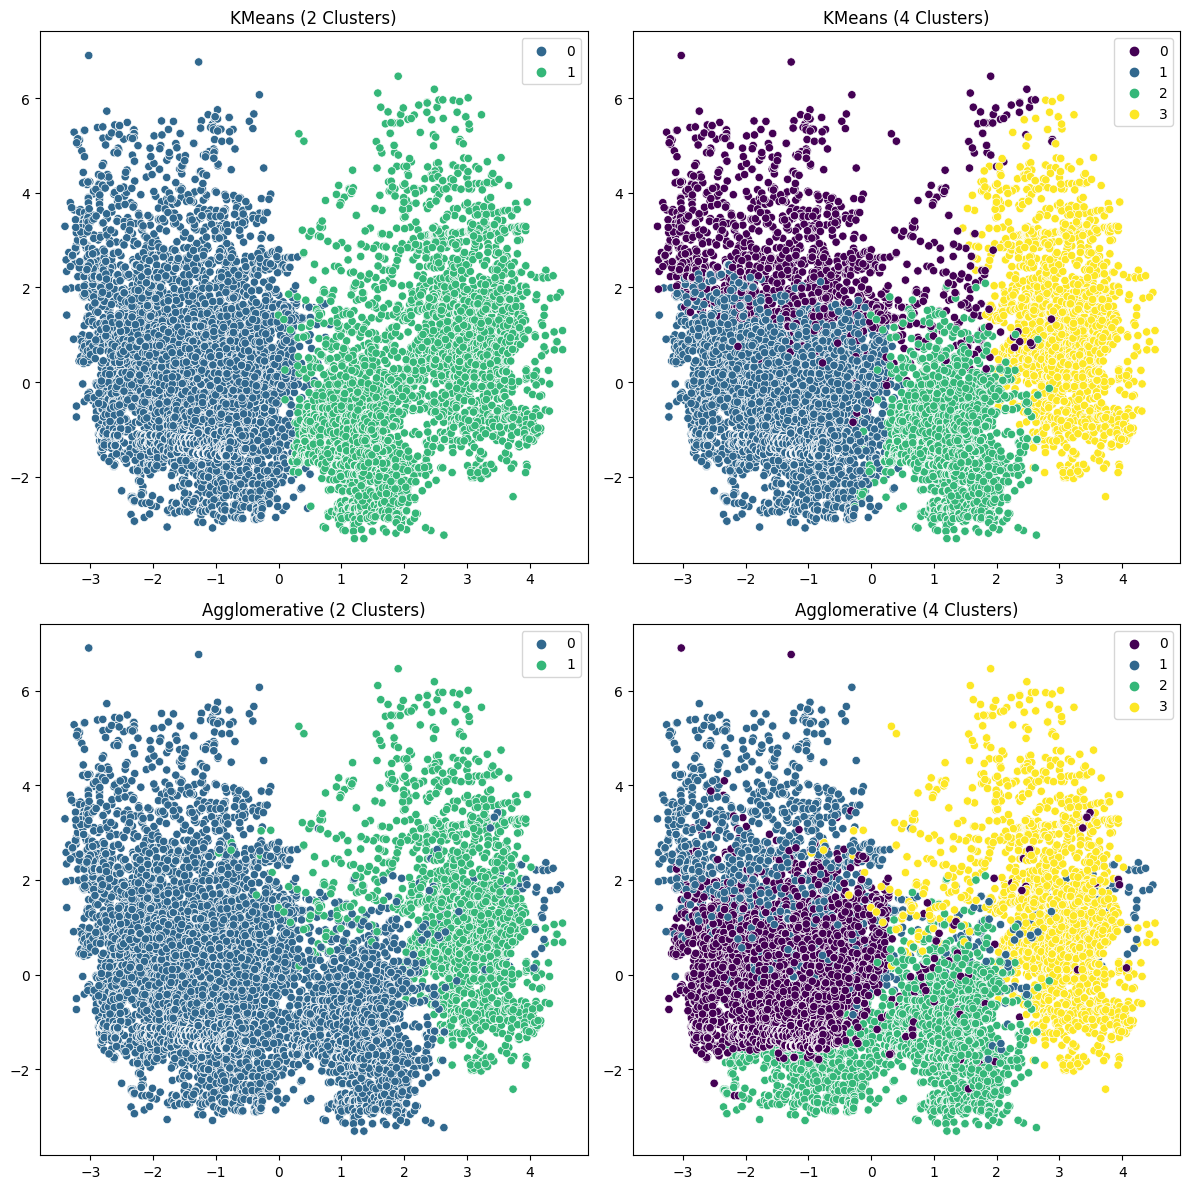

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns

# Assuming you have your data and have already run KMeans and Agglomerative Clustering
# Your clustering models
kmeans_2_clusters = KMeans(n_clusters=2)
kmeans_4_clusters = KMeans(n_clusters=4)
agg_2_clusters = AgglomerativeClustering(n_clusters=2)
agg_4_clusters = AgglomerativeClustering(n_clusters=4)

# Fit and obtain cluster labels
kmeans_2_labels = kmeans_2_clusters.fit_predict(scaled_data)
kmeans_4_labels = kmeans_4_clusters.fit_predict(scaled_data)
agg_2_labels = agg_2_clusters.fit_predict(scaled_data)
agg_4_labels = agg_4_clusters.fit_predict(scaled_data)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create subplots for each cluster configuration
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# KMeans with 2 clusters
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_2_labels, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title("KMeans (2 Clusters)")

# KMeans with 4 clusters
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_4_labels, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title("KMeans (4 Clusters)")

# Agglomerative with 2 clusters
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=agg_2_labels, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title("Agglomerative (2 Clusters)")

# Agglomerative with 4 clusters
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=agg_4_labels, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title("Agglomerative (4 Clusters)")

# Adjust subplot layout
plt.tight_layout()

# Save the plot as an image (e.g., in PNG format)
plt.savefig("cluster_plots.png")

# Display the plot
plt.show()
